# General information about the network

#### 1. Documentation
- <>

#### 2. Examples
- <>

#### Libraries

In [1]:
#database management
import sqlite3
import pandas as pd
import numpy as np 

#data visualisation
import seaborn as sns

import matplotlib.pyplot as plt

import powerlaw
sns.set_style('whitegrid')

## 1. Data preparation

In [2]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/obama_election.db')
# 2. Full dataset
df_obama = pd.read_sql('''SELECT author, parent_author
                            FROM Reddit
                            where month = 10''', conn) 
df_obama

,author,parent_author
0,gkiltz,TehSoupNazi
1,thelordofcheese,zabimaru1000
2,IAmABearAMAA,GiantSquidd
3,acm2033,hobofats
4,[deleted],kjay227
...,...,...
222059,cyress_avitus,Kishara
222060,Cum_Box_Hero,Kishara
222061,Obersts001,Kishara
222062,Kishara,Kishara


In [3]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/trump_election.db')
# 2. Full dataset
df_trump = pd.read_sql('''SELECT author, parent_author
                            FROM Reddit
                            where month = 10''', conn) 
df_trump

,author,parent_author
0,JuicyJuuce,Dyna82
1,Dyna82,JuicyJuuce
2,TheLightningbolt,mindbleach
3,mindbleach,TheLightningbolt
4,TheLightningbolt,flippydude
...,...,...
429129,formeraide,myellabella
429130,rafikiknowsdeway1,myellabella
429131,satosaison,myellabella
429132,AutoModerator,myellabella


## General analysis

#### Number of posts

In [9]:
print(len(df_obama.loc[df_obama["type"] == 'Post']))
print(len(df_trump.loc[df_trump["type"] == 'Post']))

110
110


#### Number of comments

In [10]:
print(len(df_obama.loc[df_obama["type"] == 'Comments']))
print(len(df_trump.loc[df_trump["type"] == 'Comments']))

221954
429024


#### Number of users

In [11]:
print(len(df_obama["author"].unique()))
print(len(df_trump["author"].unique()))

50409
75251


#### Posts/comments with deleted authors

In [14]:
print(len(df_obama.loc[df_obama["author"] == '[deleted]']))
print(len(df_trump.loc[df_trump["author"] == '[deleted]']))

37280
42021


#### Average number of comments per post

In [47]:
print( statistics.mean(list(df_obama[["post_id","num_comments"]].groupby("post_id").agg(['mean'])["num_comments"]["mean"])) )
print( statistics.mean(list(df_trump[["post_id","num_comments"]].groupby("post_id").agg(['mean'])["num_comments"]["mean"])) )

1855.2272727272727
3573.9363636363637


## 2. Network analysis

#### 2.1 Connectivity of nodes

In [4]:
def conn_plot(df_in_1, df_in_2):
    """
    The function visualises user roles.

    Parameters:
        df_in_1: dataframe containing values for group 1
        df_in_2: dataframe containing values for group 1
        
    """
    # data 1
    df1 = df_in_1[~df_in_1['author'].isin(['[deleted]','None'])]
    df_conn1=df1.groupby('author', as_index=False).size().to_frame(name = 'n_conn').reset_index().sort_values(by=['n_conn'], ascending=False)
    df_conn1["n_conn"] = df_conn1["n_conn"].round()
    bins1 = df_conn1['n_conn'].values[0].astype(int)
    
    # data 2
    df2=df_in_2[~df_in_2['author'].isin(['[deleted]','None'])]
    df_conn2=df2.groupby('author', as_index=False).size().to_frame(name = 'n_conn').reset_index().sort_values(by=['n_conn'], ascending=False)
    df_conn2["n_conn"] = df_conn2["n_conn"].round()
    bins2 = df_conn2['n_conn'].values[0].astype(int)
    
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .2})
    
    # plot histogram 1   
    sns.distplot(df_conn1["n_conn"], bins=bins1, ax=axes[0])
    axes[0].set_xlim(1, 15)     
    axes[0].set_ylim(0, 0.55) 
    axes[0].set_title('Distribution of connections in 2012',fontsize=15)
    axes[0].set_xlabel("Average number of connections per user",fontsize=10)
    axes[0].set_ylabel("Percentage of users",fontsize=10)
    
    # plot histogram 2    
    sns.distplot(df_conn2["n_conn"], bins=bins2, ax=axes[1])
    axes[1].set_xlim(1, 15) 
    axes[1].set_ylim(0, 0.55) 
    axes[1].set_title('Distribution of connections in 2016',fontsize=15)
    axes[1].set_xlabel("Average number of connections per user",fontsize=10)
    axes[1].set_ylabel("Percentage of users",fontsize=10)
    
    print(df_conn1['n_conn'].head())
    print(df_conn2['n_conn'].head())

38669    419
18352    311
1100     288
30330    245
20884    217
Name: n_conn, dtype: int64
39762    579
55692    578
48678    538
47986    467
74405    370
Name: n_conn, dtype: int64


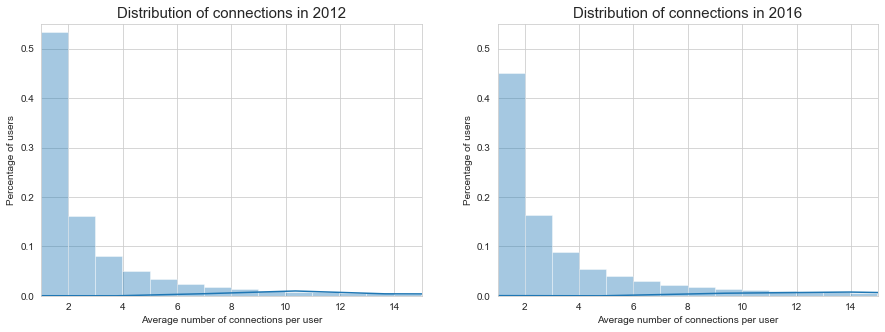

In [5]:
conn_plot(df_obama, df_trump)
plt.savefig(r'Visualisations/3_1_connections.png', bbox_inches='tight')
plt.show()

#### 2.2 Powerlaw function

In [6]:
def power_plot(df_in_1, df_in_2):
    """
    The function visualises user roles.

    Parameters:
        df_in_1: dataframe containing values for group 1
        df_in_2: dataframe containing values for group 1
        
    """
     # data 1
    df1= df_in_1[~df_in_1['author'].isin(['[deleted]','None'])]
    df_conn1=df1.groupby('author', as_index=False).size().to_frame(name = 'n_conn').reset_index().sort_values(by=['n_conn'], ascending=False)
    df_conn1["n_conn"] = df_conn1["n_conn"].round()
    bins1 = df_conn1['n_conn'].values[0].astype(int)
    
    # data 2
    df2=df_in_2[~df_in_2['author'].isin(['[deleted]','None'])]
    df_conn2=df2.groupby('author', as_index=False).size().to_frame(name = 'n_conn').reset_index().sort_values(by=['n_conn'], ascending=False)
    df_conn2["n_conn"] = df_conn2["n_conn"].round()
    bins2 = df_conn2['n_conn'].values[0].astype(int)
        
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .2})
    
    # plot histogram    
    fit1 = powerlaw.Fit(df_conn1["n_conn"] ,discrete=True)
    fit1.power_law.plot_pdf( color= 'b',linestyle='--', label='fit ccdf', ax=axes[0])
    fit1.plot_pdf( color= 'b', ax=axes[0])
    axes[0].set_title('Powerlaw function',fontsize=15)
    axes[0].set_xlabel("Node degree",fontsize=10)
    axes[0].set_ylabel("Percentage of nodes",fontsize=10)
    
    # plot powerlaw
    fit2 = powerlaw.Fit(df_conn2["n_conn"] ,discrete=True)
    fit2.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf', ax=axes[1])
    fit2.plot_pdf( color= 'b', ax=axes[1])
    axes[1].set_title('Powerlaw function',fontsize=15)
    axes[1].set_xlabel("Node degree",fontsize=10)
    axes[1].set_ylabel("Percentage of nodes",fontsize=10)
    
    print('alpha= ',fit1.power_law.alpha,'  sigma= ',fit1.power_law.sigma)    
    print('alpha= ',fit2.power_law.alpha,'  sigma= ',fit2.power_law.sigma)
    plt.tight_layout()
    

Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


alpha=  3.522737595507032   sigma=  0.15987199919826173
alpha=  3.480693208869492   sigma=  0.11442584513637118


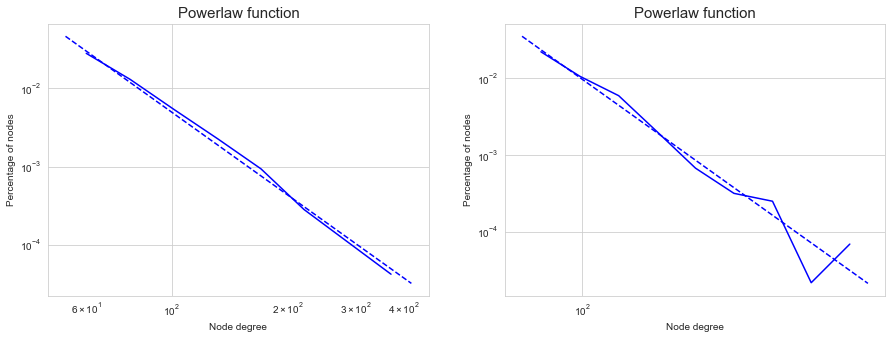

In [7]:
power_plot(df_obama, df_trump)
plt.savefig(r'Visualisations/3_2_power_law.png', bbox_inches='tight')
plt.show()

## 3. User roles (donor/recipient)

In [8]:
def author_plot(df_in_1, df_in_2):
    """
    The function visualises user roles.

    Parameters:
        df_in_1: dataframe containing values for group 1
        df_in_2: dataframe containing values for group 1
        
    """
        
    # =============================================================================================
    # data 1
    # donor
    x1=df_in_1['parent_author'].value_counts().to_frame().reset_index()
    # recipient
    y1=df_in_1['author'].value_counts().to_frame().reset_index()
    
    df_1=pd.merge(x1, y1, on="index")
    df_1["user_activity"]=(df_1["parent_author"]/(df_1["author"]+df_1["parent_author"])).round(2)
    df_1=df_1[~df_1['index'].isin(['[deleted]','None'])]\
            .sort_values(by=['user_activity'], ascending=False)\
            .rename(columns={"author": "recipient", "parent_author": "donor", "index": "author"})
    print(len(df_1))
    
    # =============================================================================================
    # data 2
    # donor
    x2=df_in_2['parent_author'].value_counts().to_frame().reset_index()
    # recipient
    y2=df_in_2['author'].value_counts().to_frame().reset_index()
    
    df_2=pd.merge(x2, y2, on="index")
    df_2["user_activity"]=(df_2["parent_author"]/(df_2["author"]+df_2["parent_author"])).round(2)
    df_2=df_2[~df_2['index'].isin(['[deleted]','None'])]\
            .sort_values(by=['user_activity'], ascending=False)\
            .rename(columns={"author": "recipient", "parent_author": "donor", "index": "author"})
    print(len(df_2))
    
    # =============================================================================================
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .15})
    
    # =============================================================================================
    # plot 1    
    axes[0].hist(df_1["user_activity"], bins=20, facecolor='blue', alpha=0.5)
    #sns.distplot(df_1["user_activity"], bins=20, ax=axes[0])
    #axes[0].set_xlim(0, 1) 
    axes[0].set_ylim(0, 13000) 
    axes[0].set_title('Donor/recipient relation in 2012',fontsize=15)
    axes[0].set_xlabel("User score",fontsize=10)
    #axes[0].set_ylabel("Percentage of comments",fontsize=10)
    
    # =============================================================================================
    # plot 2
    axes[1].hist(df_2["user_activity"], bins=20, facecolor='blue', alpha=0.5)
    #sns.distplot(df_2["user_activity"], bins=20, ax=axes[1])
    #axes[1].set_xlim(0, 1) 
    axes[1].set_ylim(0, 13000) 
    axes[1].set_title('Donor/recipient relation in 2016',fontsize=15)
    axes[1].set_xlabel("User score",fontsize=10)
    #axes[1].set_ylabel("Percentage of comments",fontsize=10)


25488
44687


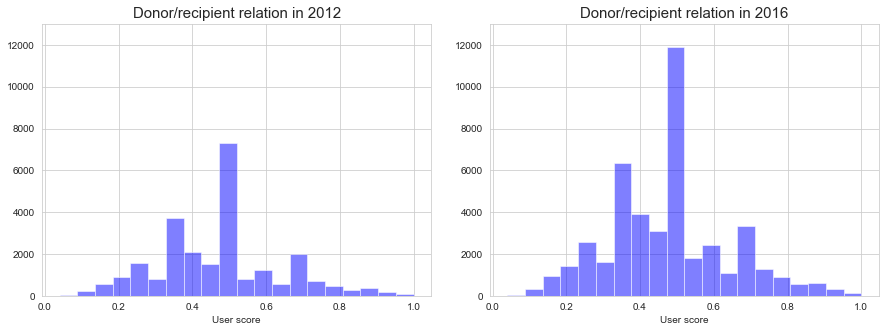

In [9]:
author_plot(df_obama,df_trump)
plt.savefig(r'Visualisations/3_3_user_roles.png', bbox_inches='tight')
plt.show()